In [22]:
import numpy as np
from arviz import *
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(10)
from pymc3 import *
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Read data file 
choi_df = pd.read_csv('coproduction_rfr.csv',encoding = "ISO-8859-1")
choi_df = choi_df.dropna() # drop missing rows
choi_df.head()

,urban,homeowner,age,high,college,graduate,gender,efficacy,socialcapital,salience,experience,children,trustinlocal,white,performance,income,willingness,protective
0,0.0,1.0,23.0,1.0,1.0,0.0,1,9,5,5.0,0,2.0,6.0,0.0,1.0,2.0,1.0,1.0
1,0.0,0.0,18.0,1.0,0.0,0.0,1,1,2,0.0,0,1.0,5.0,0.0,2.0,2.0,0.0,1.0
3,1.0,0.0,26.0,1.0,1.0,0.0,0,0,4,3.0,1,0.0,4.0,0.0,3.0,1.0,1.0,1.0
5,1.0,0.0,52.0,1.0,0.0,0.0,0,0,4,5.0,0,0.0,6.0,0.0,2.0,1.0,1.0,1.0
7,1.0,1.0,55.0,1.0,0.0,0.0,0,4,4,3.0,0,4.0,5.0,0.0,3.0,2.0,1.0,0.0


In [24]:
# Minmaxscaling of dataframe
scaler = MinMaxScaler()
choi_df[choi_df.columns] = scaler.fit_transform(choi_df[choi_df.columns])
choi_df.head()

,urban,homeowner,age,high,college,graduate,gender,efficacy,socialcapital,salience,experience,children,trustinlocal,white,performance,income,willingness,protective
0,0.0,1.0,0.072464,1.0,1.0,0.0,1.0,0.9,0.714286,0.625,0.0,0.50,0.6,0.0,0.0,0.333333,1.0,1.0
1,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.1,0.285714,0.000,0.0,0.25,0.5,0.0,0.5,0.333333,0.0,1.0
3,1.0,0.0,0.115942,1.0,1.0,0.0,0.0,0.0,0.571429,0.375,1.0,0.00,0.4,0.0,1.0,0.000000,1.0,1.0
5,1.0,0.0,0.492754,1.0,0.0,0.0,0.0,0.0,0.571429,0.625,0.0,0.00,0.6,0.0,0.5,0.000000,1.0,1.0
7,1.0,1.0,0.536232,1.0,0.0,0.0,0.0,0.4,0.571429,0.375,0.0,1.00,0.5,0.0,1.0,0.333333,1.0,0.0


In [25]:
# Print variable names
for col in choi_df.columns: 
    print(col)

urban
homeowner
age
high
college
graduate
gender
efficacy
socialcapital
salience
experience
children
trustinlocal
white
performance
income
willingness
protective


In [26]:
#https://docs.pymc.io/notebooks/GLM.html for reference

with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('protective ~ urban + homeowner + age + high + college + graduate + gender + efficacy + socialcapital + salience + experience + children + trustinlocal + white + performance + income', choi_df, family=glm.families.Binomial())
    trace = sample(3000, cores=2, tune=1000, init='adapt_diag') # draw 3000 posterior samples using NUTS sampling

INFO (theano.gof.compilelock): Refreshing lock /home/rmlans/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.8-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [income, performance, white, trustinlocal, children, experience, salience, socialcapital, efficacy, gender, graduate, college, high, age, homeowner, urban, Intercept]
Sampling 2 chains: 100%|██████████| 8000/8000 [05:47<00:00, 17.51draws/s]


INFO (theano.gof.compilelock): Refreshing lock /home/rmlans/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.8-64/lock_dir/lock
/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

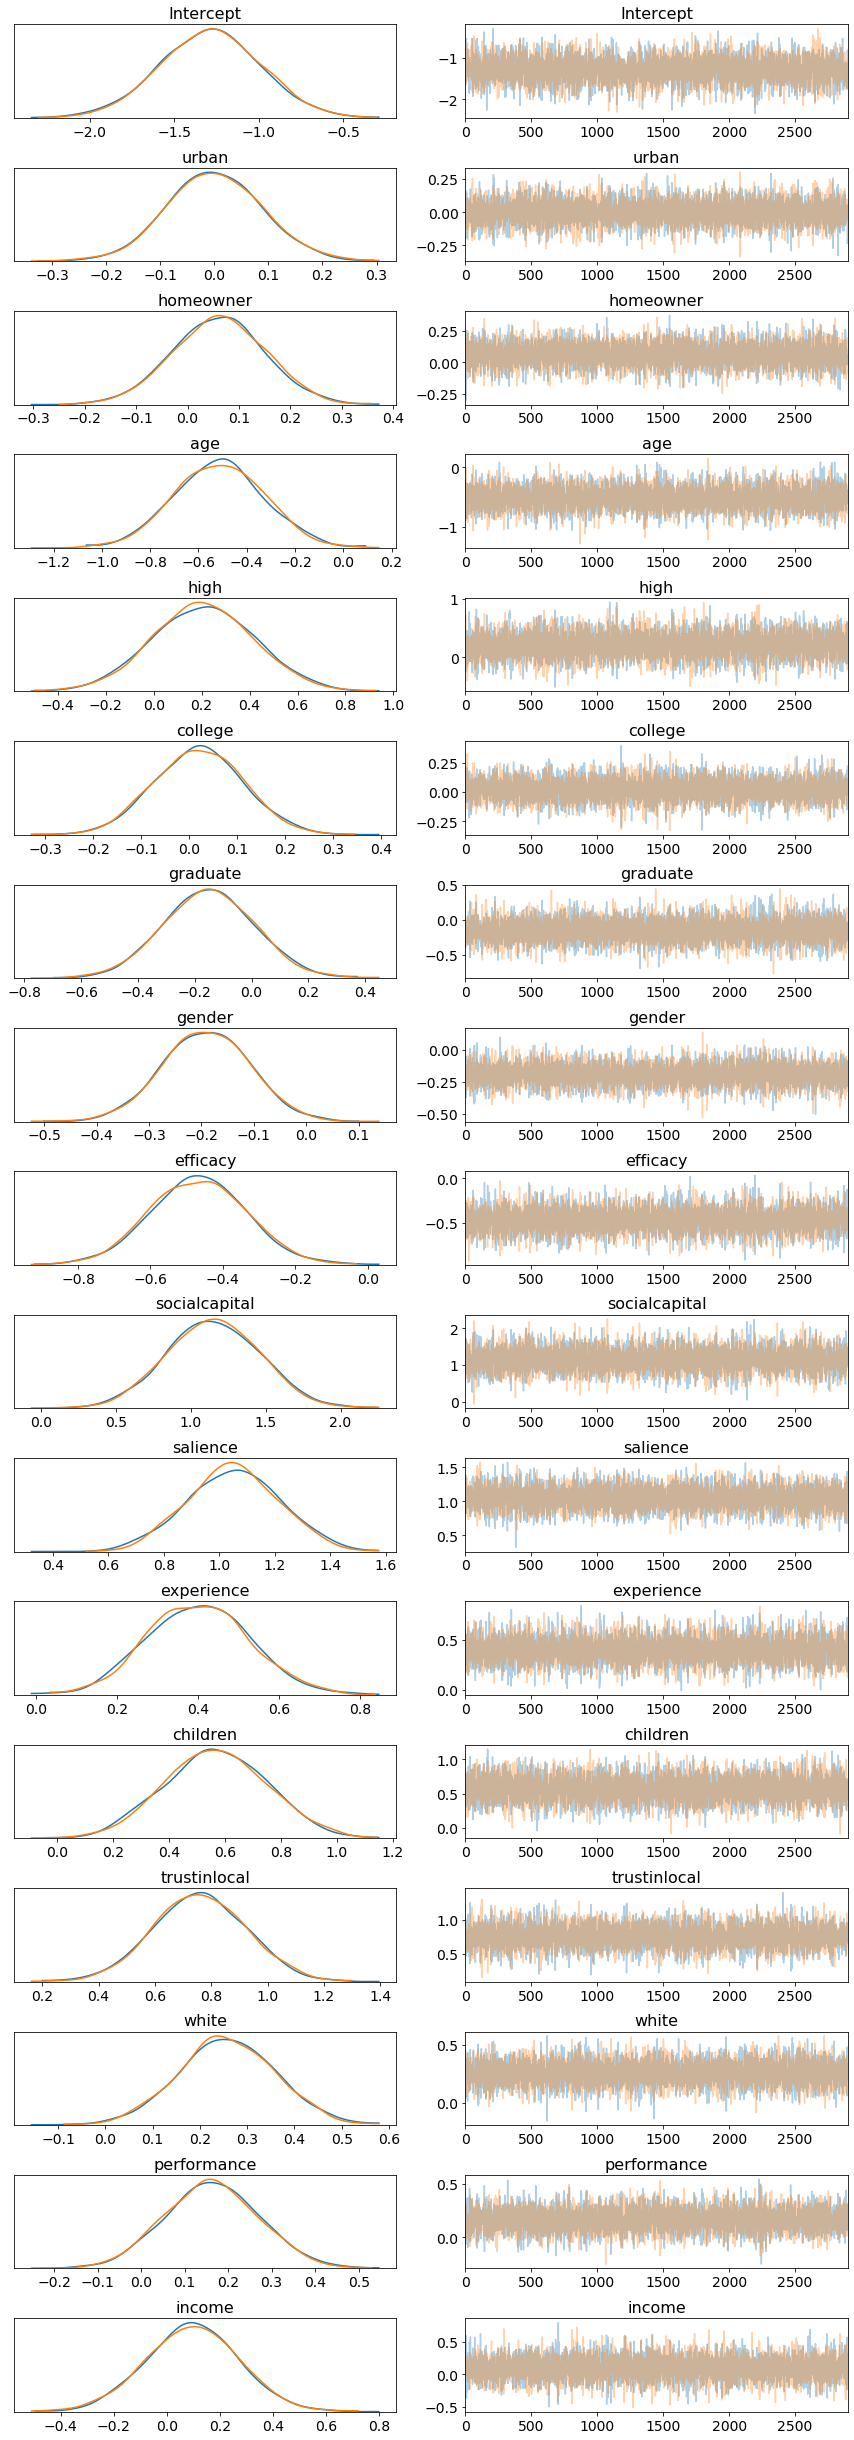

In [27]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();